\pagenumbering{gobble}
\ 
\ 
\ 
\ 
\ 
\ 
\ 
\ 
\ 



Just a simple way to work with manually created growth curves.

*13.10.2022*

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PARAMS import *

{'14': 'TS', '15': '1197', '16': '1115', '17': '1116'}


We define a function called `get_linestyle` where we define how the plot will look.

In [2]:
def get_linestyle(df):
    #colors = ['#1f77b4', '#ff7f0e', '#2ca02c', 
    #            '#d62728', '#9467bd', '#8c564b', 
    #            '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    colors = cb
    lines = ['o-', 's--', 'p-.', 'd--', 'x-.']
    old_name = 'yyy'
    color_count = -1
    line_count = 0
    color = []
    marker = []
    for name in df.columns:
        if name[:2] != old_name[:2]:
            line_count = 0
            color_count += 1
        color.append(colors[color_count])
        marker.append(lines[line_count])
        line_count += 1
        old_name = name
            
    return color, marker

Optional: We can define matplotlib to use pgf which makes importing into .tex better. Plots will not be shown but saved to a file. Defining the filepath only makes sense with that option.

In [3]:
#matplotlib.use("pgf")
#matplotlib.rcParams.update({"pgf.texsystem": "pdflatex", 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False})
#path_to_save = '/Users/baeuerle/Organisation/Masterarbeit/Nextcloud/master_thesis/thesis/figures/single_curves/'
#filefig = path_to_save + 'Cstr_growth_210722' '.pgf'

Manual growth curve means we measured the OD values by hand and did not use a plate reader. 

We can read sheet be sheet using sheet_name. Just change this value if you want to access another sheet. New data can just be added in a new sheet.

In [5]:
sheet = 'Growth_210721'
df = pd.read_excel('../data/manual_growth_curves.xlsx', sheet_name=sheet).dropna()

We did normalize the data by dividing through the first value (in excel). This will be divided now into two dataframes.

In [ ]:
cols = [c for c in df.columns if c[-4:] != 'norm']
cols_norm = [c for c in df.columns if c[-4:] == 'norm' or c == 'time (min)']

growth_df = df[cols].set_index('time (min)')
growth_df_norm = df[cols_norm].set_index('time (min)')

Now we can plot both dataframes. Uncomment savefig when you defined that in the cell above.

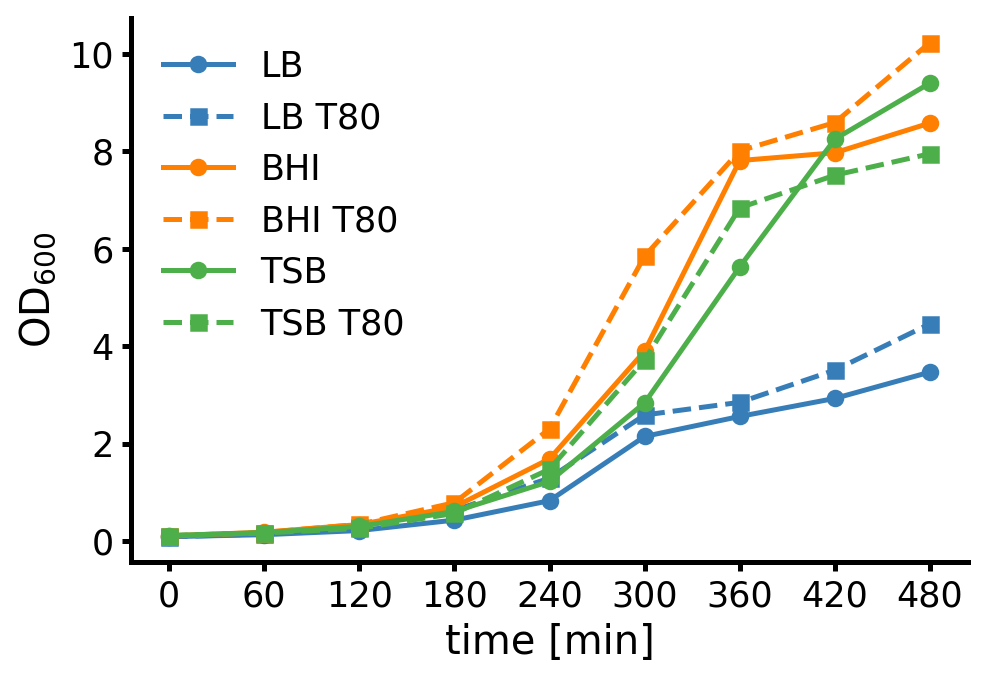

In [ ]:
growth_df.plot(style=get_linestyle(growth_df)[1], 
                color=get_linestyle(growth_df)[0], 
                #logy=True,
                #grid=True, 
                #title=r'$\it{C. striatum}$ growth', 
                xticks=growth_df.index.tolist(),
                ylabel=r'OD$_{600}$',
                xlabel='time [min]').get_figure().savefig('figures/growth_210721.png')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<AxesSubplot:xlabel='time [min]', ylabel='OD$_{600}$/(OD$_{600}$ [t=0])'>

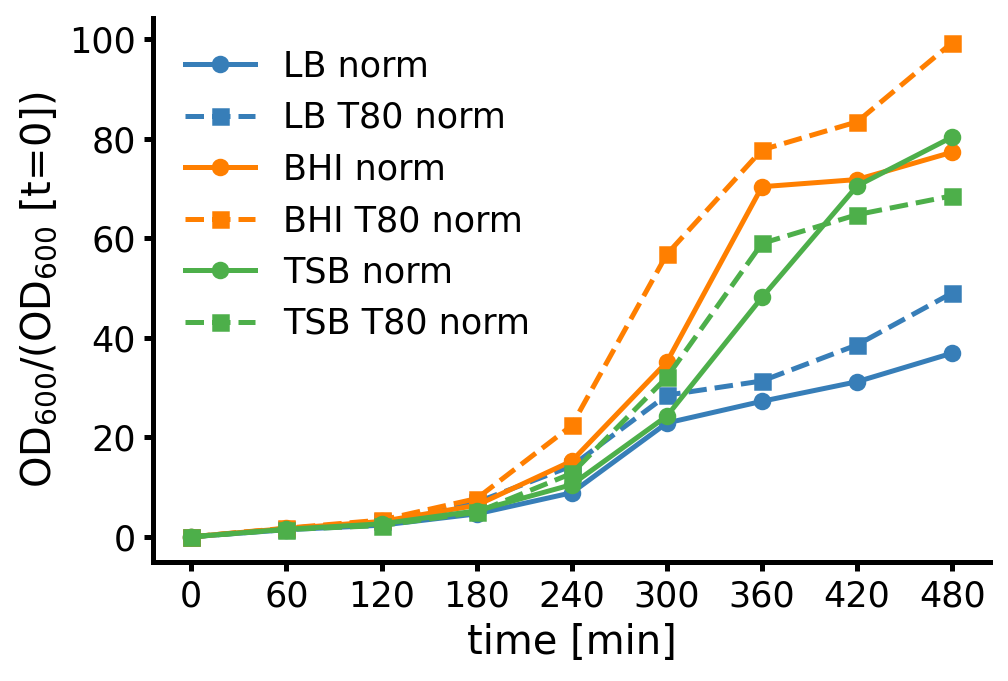

In [ ]:
growth_df_norm.plot(style=get_linestyle(growth_df_norm)[1], 
                    color=get_linestyle(growth_df_norm)[0],
                    #logy=True,
                    #grid=True,
                    #title=r'$\it{C. striatum}$ growth - normalized', 
                    xticks=growth_df_norm.index.tolist(),
                    ylabel=r'OD$_{600}$/(OD$_{600}$ [t=0])',
                    xlabel='time [min]')#.get_figure().savefig('figures/growth_norm_210722.png')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Calculating the doubling time can be done by determining the exponential phase from looking at the plot and choosing two points within that phase. These can then be connected. The slope represents the growth rate.

In [ ]:
t1 = 240
t2 = 360

od1 = growth_df.loc[t1]
od2 = growth_df.loc[t2]
n = (np.log(od2)-np.log(od1))/np.log(2)
td = (t2-t1) / n
td

LB          74.006081
LB T80     105.550533
BHI         54.340460
BHI T80     66.753389
TSB         54.565893
TSB T80     54.290043
dtype: float64

I collected new data to determine where a log-phase transfer is possible from TSB to a medium of interest.

In [3]:
sheet = 'Growth_221117'
df = pd.read_excel('../data/manual_growth_curves.xlsx', sheet_name=sheet).dropna()
df = df.drop([14,15,16,17], axis=1)

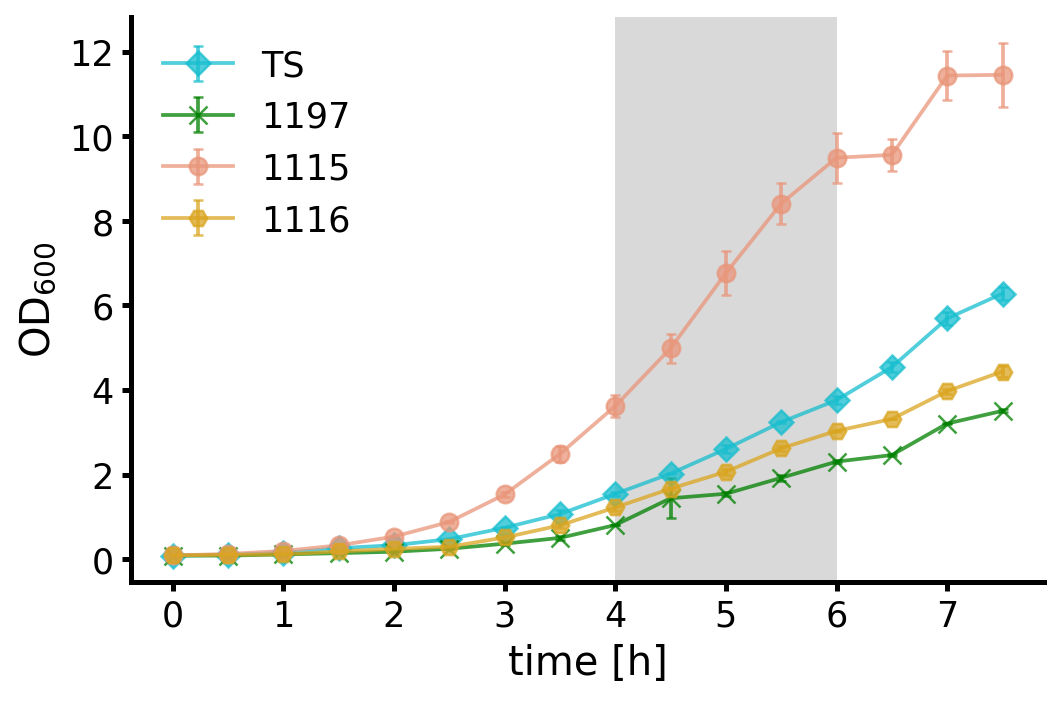

In [6]:
i = 0
for strain in ['14', '15', '16', '17']:
    df[strain + '_mean'] = df[[strain +'-1', strain +'-2', strain +'-3']].mean(axis = 1)
    df[strain + '_err'] = df[[strain +'-1', strain +'-2', strain +'-3']].std(axis = 1)
    plt.errorbar(df['time (min)'],df[strain + '_mean'], yerr=df[strain + '_err'], label=strain,
                marker=markers[i], 
                color=colorstandards[strain],
                ms=7,
                linestyle='-',
                linewidth=1.5,
                capsize=2.0,
                alpha=.75
                )
    i += 1
plt.legend(frameon=False)#, fontsize=8)
plt.legend(labels=[STRAINS_LAB[i.get_text()] for i in plt.gca().get_legend().get_texts()])
plt.xticks(np.arange(0, 7.5, 1))
plt.axvspan(4, 6, facecolor='k', alpha=0.15)
plt.xlabel('time [h]', fontsize=16)
plt.ylabel(r'OD$_{600}$', fontsize=16)
plt.tight_layout()
plt.savefig('../figures/TSB_manual.png')